# Libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)

plt.style.use('ggplot')

# Data Preperation

In [123]:
df = pd.read_csv("heart_disease_uci.csv", index_col=0)
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [124]:
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB
              age    trestbps        chol      thalch     oldpeak          ca  \
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000   
mean    53.

In [125]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("\nName of the columns:")
print(df.columns)

Dataset has 920 rows and 15 columns.

Name of the columns:
Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


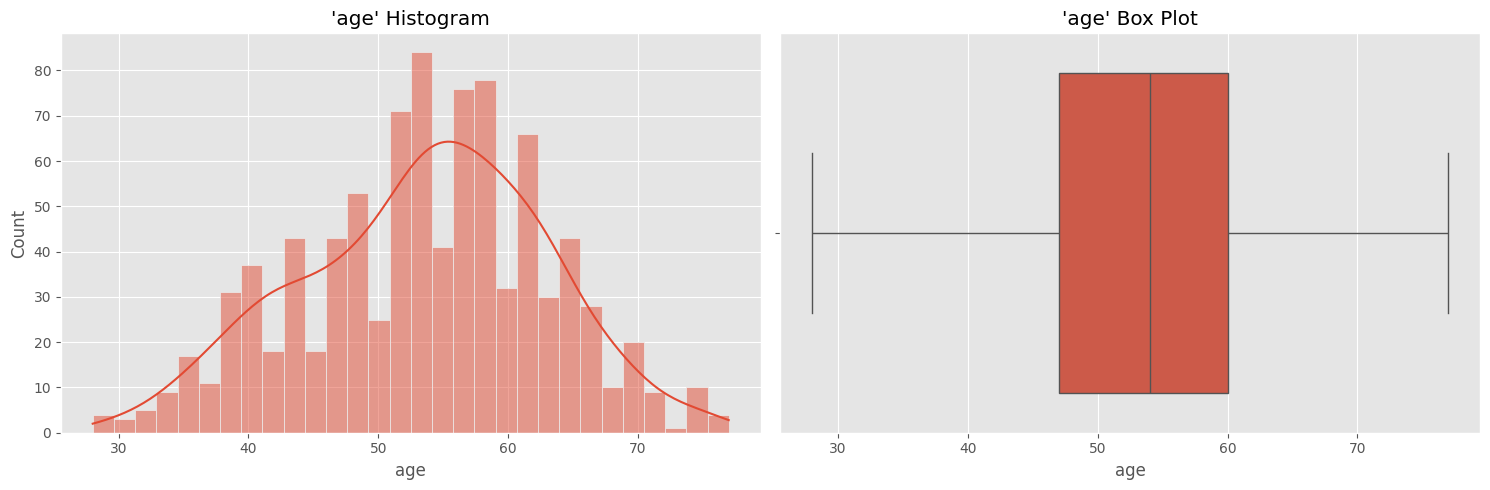

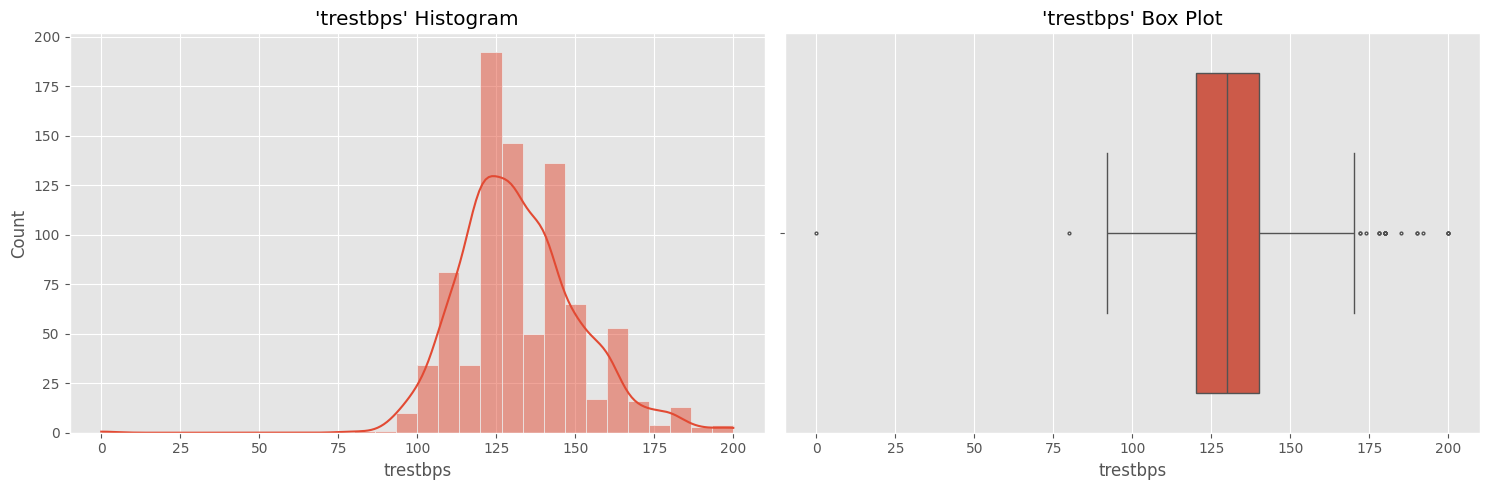

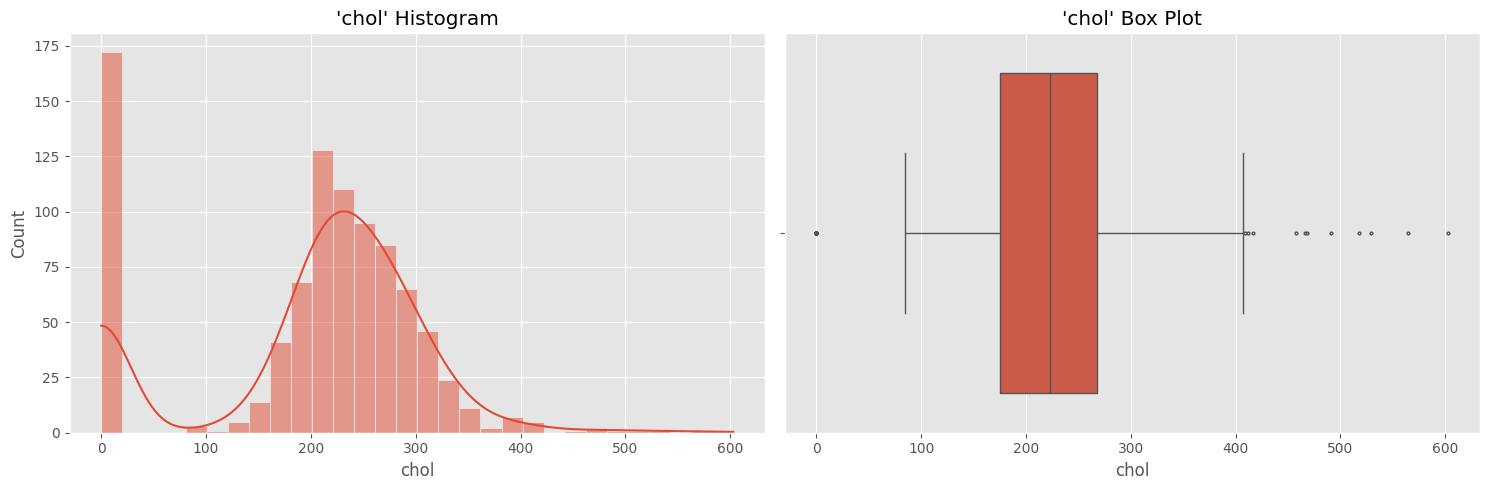

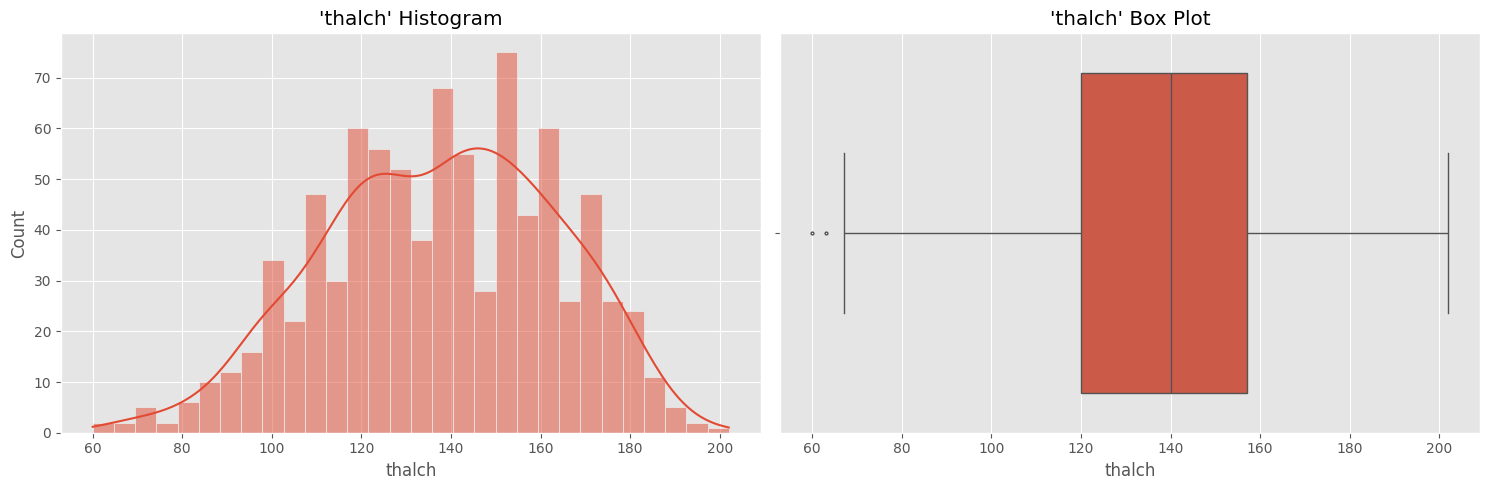

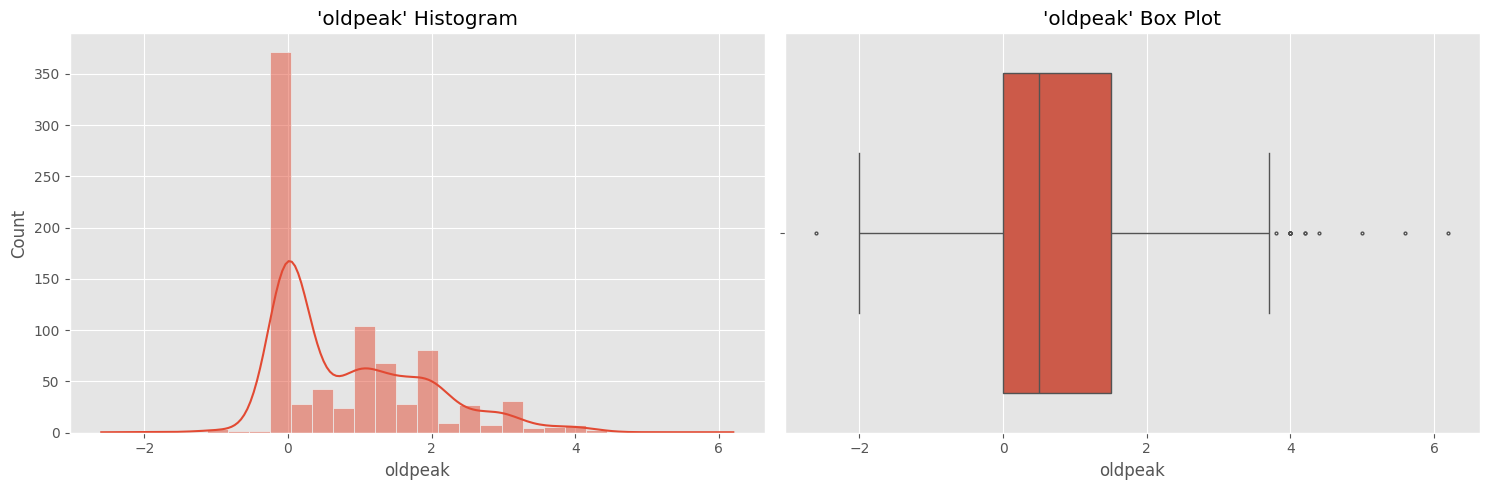

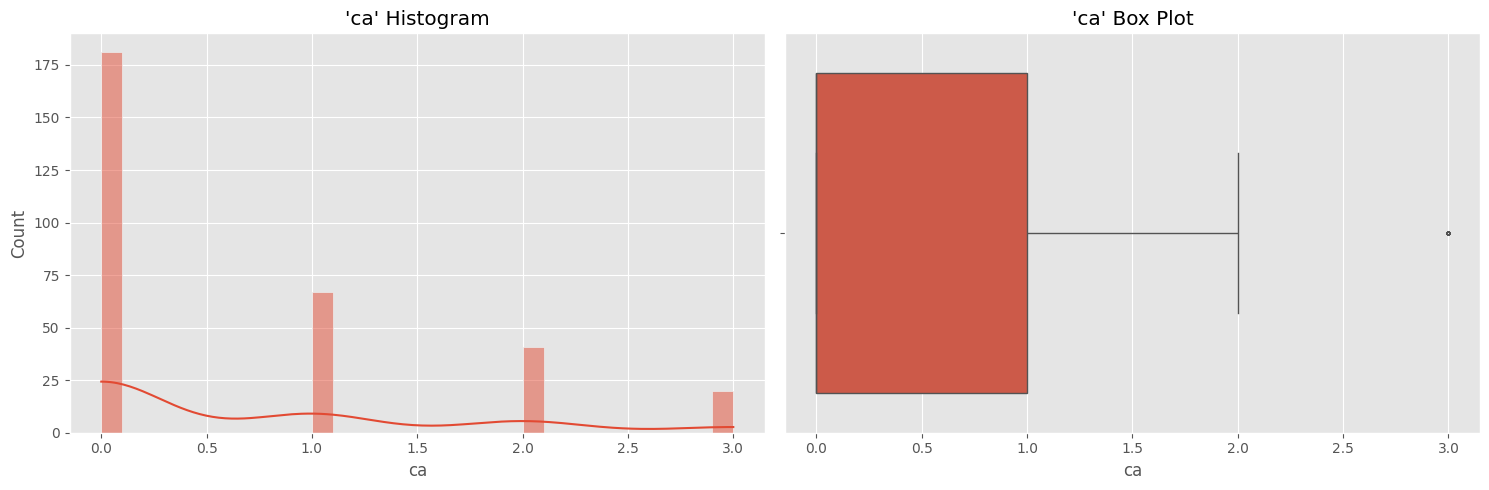

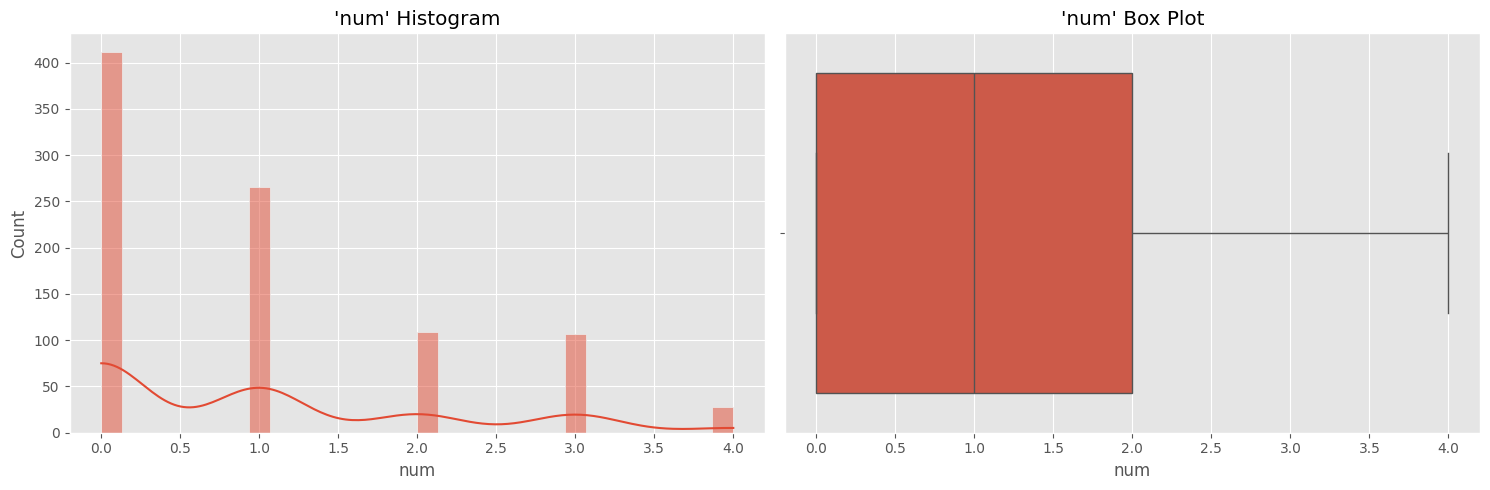

In [126]:
df = df.reset_index(drop=True)

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"'{col}' Histogram")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], fliersize=2)  
    plt.title(f"'{col}' Box Plot")
    
    plt.tight_layout()
    plt.show()


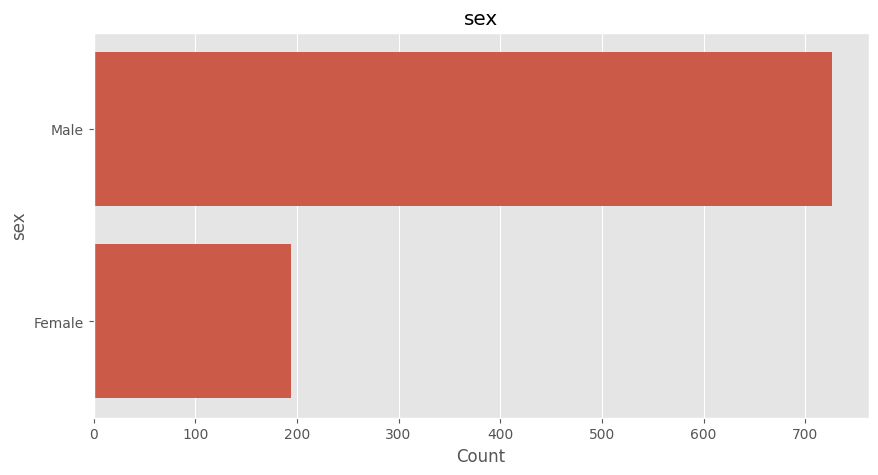

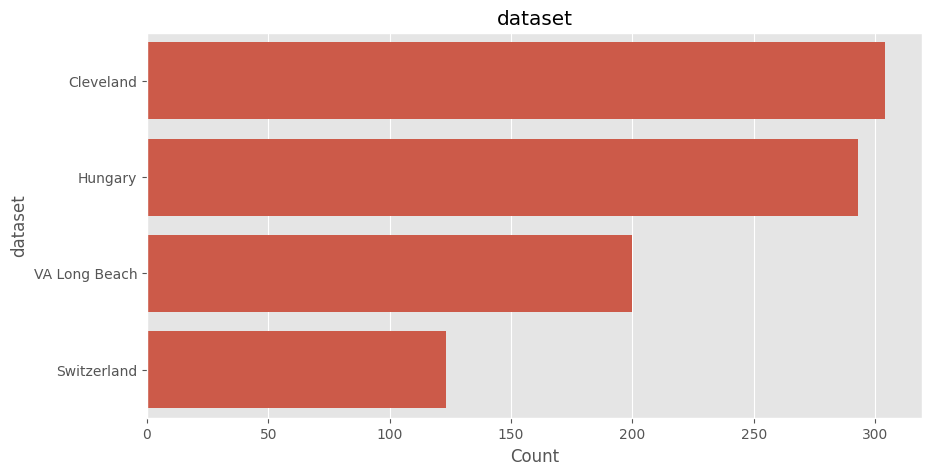

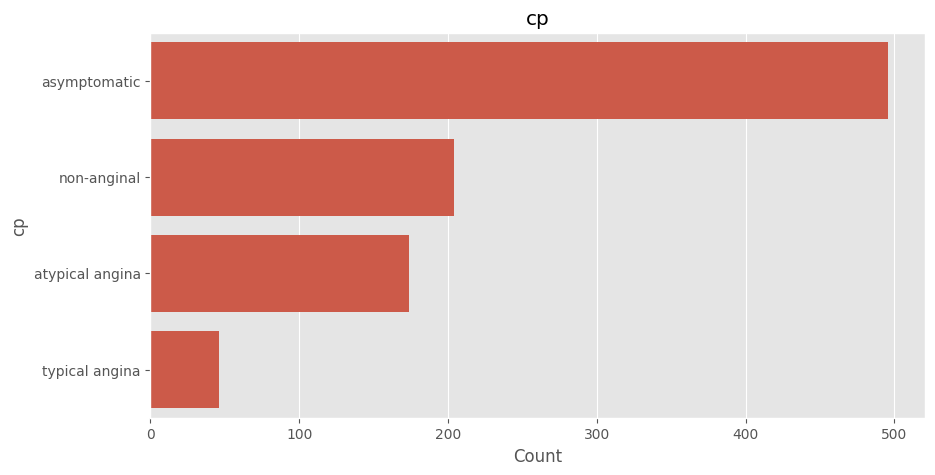

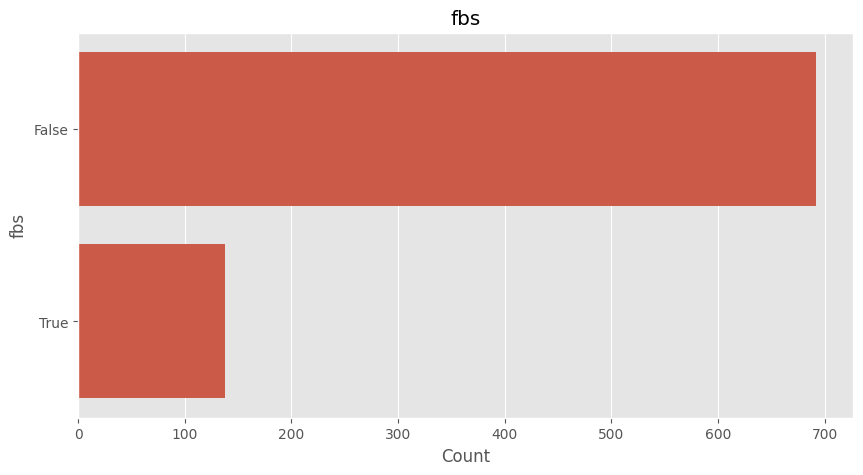

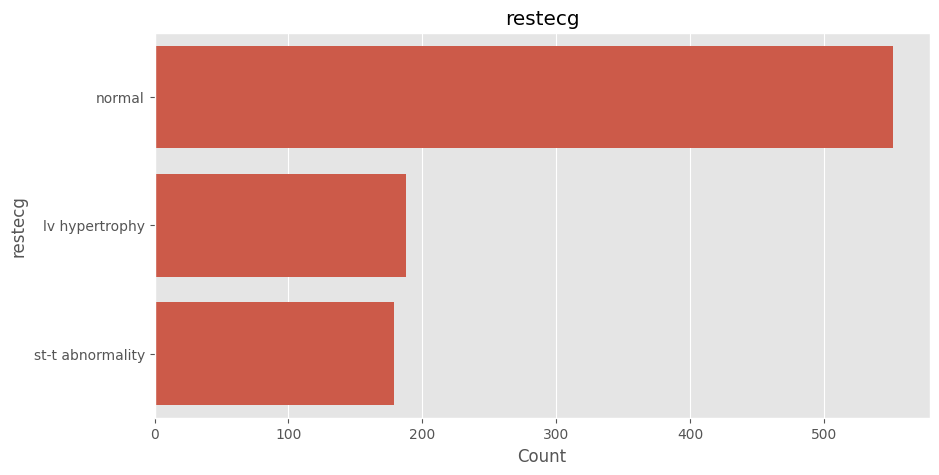

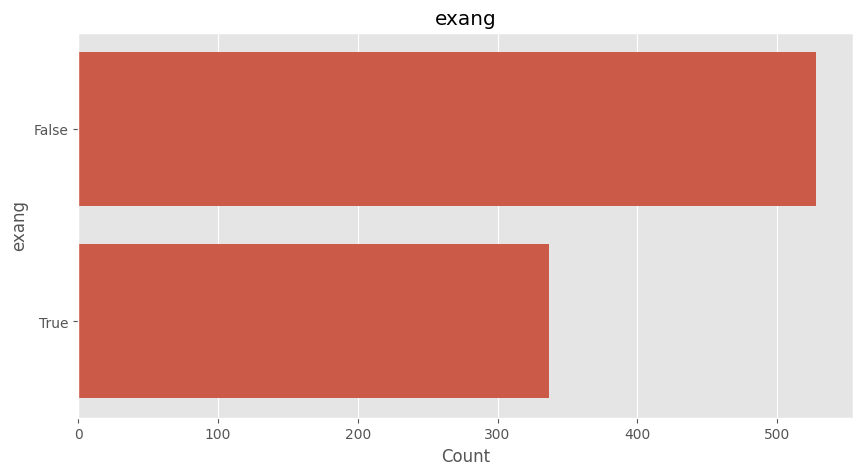

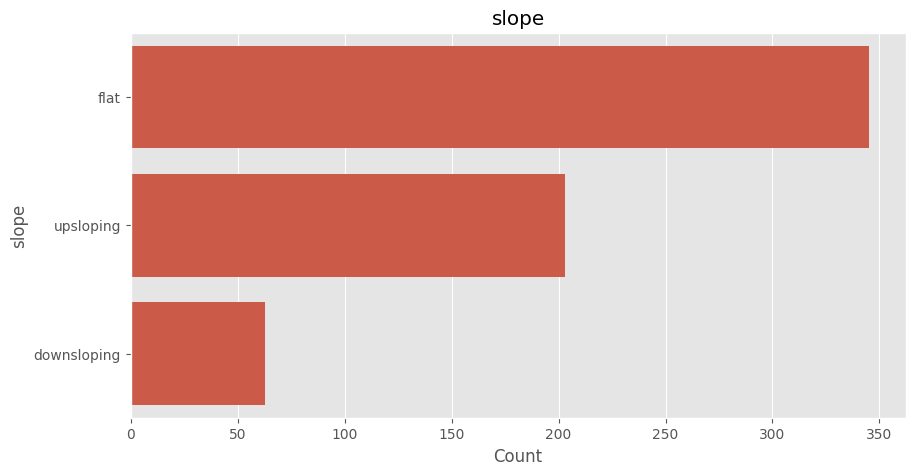

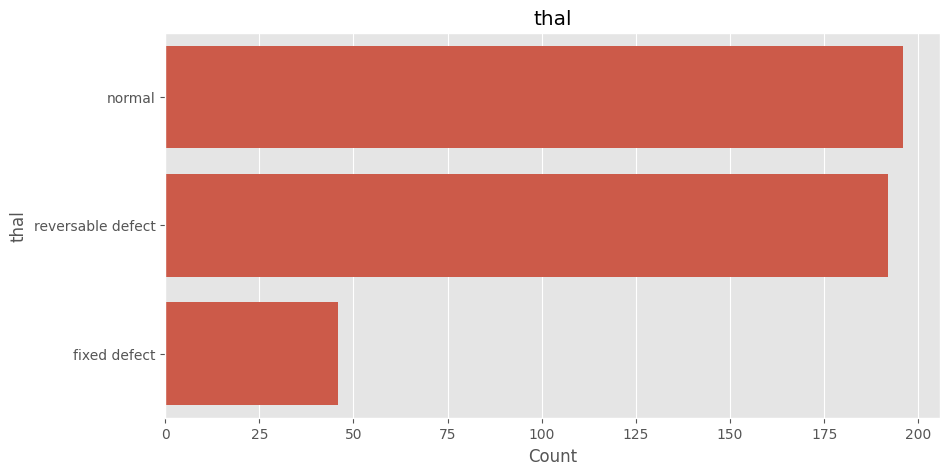

In [127]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order = df[col].value_counts().index)
    plt.title(col)
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

In [128]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.isnull().sum())

Dataset has 920 rows and 15 columns.
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [129]:
X = df.drop(columns=["num", "slope", "ca", "thal"])
# X = df.drop(columns=["num"])

y = df["num"]

y = (y > 0).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [130]:
print(X.isnull().sum())

age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
dtype: int64


# Separate categorical and numeric


In [131]:
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

# Preprocessing pipelines


In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# Model Pipeline

In [205]:
# better for auc


# best_lr_model = Pipeline([
#     ("preprocessor", preprocessor),
#     ("classifier", LogisticRegression(   
#         max_iter=10000,
#         solver='saga',
#         C=1,           
#         penalty='l1'   
#     ))
# ])


# Better for f1
best_lr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=10000,
        solver='saga',
        C=0.1,
        penalty='l2'
    ))
])

best_lr_model.fit(X_train, y_train)


best_lr_model.fit(X_train, y_train)

best_gb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(n_estimators=200, random_state=42))
])
best_gb_model.fit(X_train, y_train)

final_rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='log2',
        max_depth=5,
        class_weight=None,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ))
])
final_rf_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Model dict

In [201]:
models = {
    "Logistic Regression": best_lr_model,
    "Random Forest": final_rf_model,
    "Gradient Boosting": best_gb_model
}

# Evaluate all models

In [202]:
results = []
cms = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    results.append([name, acc, f1, roc_auc])
    
    cms.append((name, confusion_matrix(y_test, y_pred)))

# ROC Metrics Table

In [203]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-Score", "ROC AUC"])
print("ROC Metrics Comparison:\n")
print(results_df)

ROC Metrics Comparison:

                 Model  Accuracy  F1-Score   ROC AUC
0  Logistic Regression  0.831522  0.853081  0.915830
1        Random Forest  0.858696  0.875000  0.927905
2    Gradient Boosting  0.853261  0.868293  0.901004


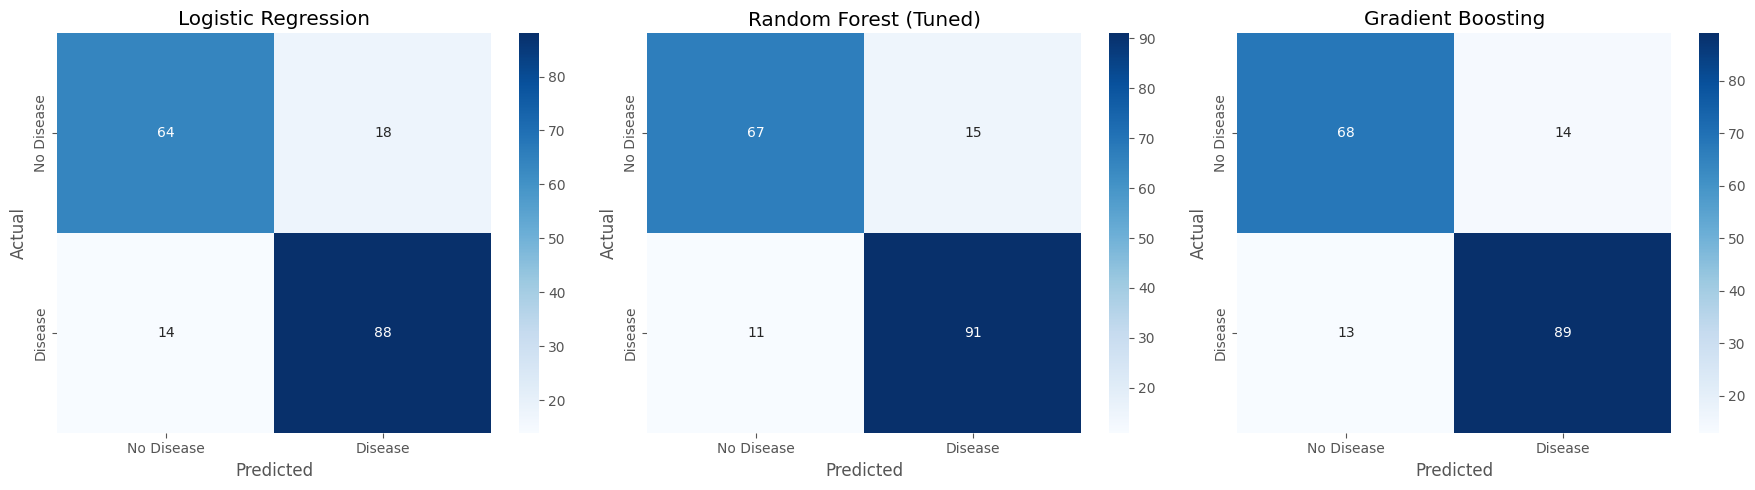

In [191]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for i, (name, cm) in enumerate(cms):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=["No Disease","Disease"],
                yticklabels=["No Disease","Disease"])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_title(f"{name}")

plt.tight_layout()
plt.show()

# ROC Curves


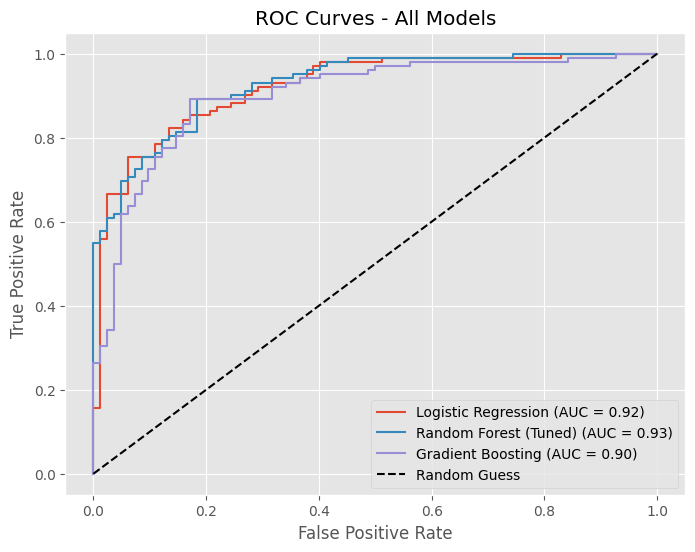

In [192]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - All Models")
plt.legend()
plt.show()